In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
cond = df['Species'].isin(['Bream', 'Smelt'])

In [35]:
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [36]:
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [37]:
fish_target = df.loc[cond, ['Species']]

In [38]:
fish_target.tail()

,Species
154,Smelt
155,Smelt
156,Smelt
157,Smelt
158,Smelt


데이터 분할을 위한 train_test_split 함수
```python
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
```

```
(1) Parameter

arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

shuffle : 셔플여부설정 (default = True)

stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

​

(2) Return

X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.

X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환
```

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
kn = KNeighborsClassifier()

In [43]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [44]:
kn.score(test_input, test_target)

1.0

In [45]:
kn.predict([[25, 150]])

C:\Users\h_j06\Desktop\DMF\ml\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

In [54]:
test_dict = {
    'Length2': 25,
    'Weight': 200,
}

test_df = pd.DataFrame(test_dict, index=[0])
# 왜 인덱스 [0]?

In [53]:
test_df

,Length2,Weight
0,25,200


In [47]:
kn.predict(test_df)

array(['Bream'], dtype=object)

In [55]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


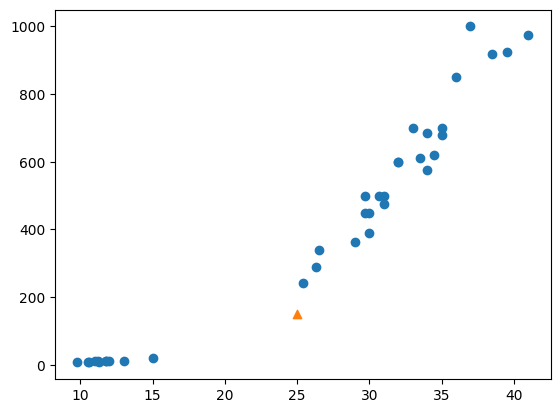

In [56]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')
plt.show()

In [57]:
#kneighbors() 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

distances, indexes = kn.kneighbors([[25, 150]])

C:\Users\h_j06\Desktop\DMF\ml\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [61]:
indexes

array([[12, 29,  5, 19,  4]])

In [62]:
indexes[0]

array([12, 29,  5, 19,  4])

In [63]:
n_df = train_input.iloc[indexes[0]]

In [64]:
n_df

,Length2,Weight
0,25.4,242.0
158,15.0,19.9
156,13.0,12.2
1,26.3,290.0
151,11.8,10.0


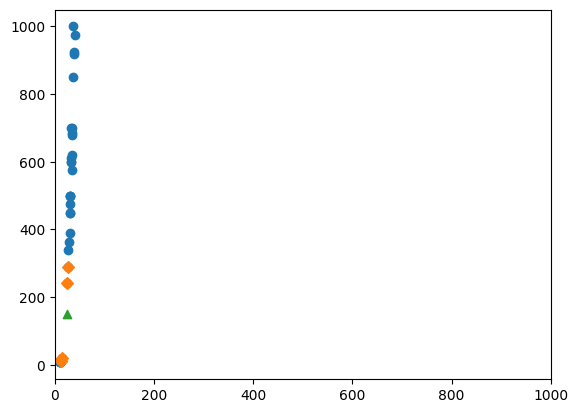

In [81]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000) #x축이 표시되는 범위 지정, x와 y의 단위(스케일)이 다르므로 맞춰줘야 함
plt.show()

- 전처리: 표준점수
  (데이터 - 평균) / 표준편차

In [71]:
mean = train_input.mean()

In [72]:
std = train_input.std()

In [73]:
train_input.head()

,Length2,Weight
8,30.0,450.0
3,29.0,363.0
6,29.7,500.0
150,11.3,8.7
151,11.8,10.0


In [74]:
(train_input - mean).head()

,Length2,Weight
8,3.825,31.911111
3,2.825,-55.088889
6,3.525,81.911111
150,-14.875,-409.388889
151,-14.375,-408.088889


In [75]:
train_scaled = (train_input - mean) / std

In [76]:
new = ([25, 150] - mean) / std
new

Length2   -0.113465
Weight    -0.821750
dtype: float64

In [77]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [78]:
test_scaled = (test_input - mean) / std

In [79]:
kn.score(test_scaled, test_target)

1.0

In [82]:
kn.predict([new])

C:\Users\h_j06\Desktop\DMF\ml\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## 펭귄데이터 연습

In [83]:
import seaborn as sns

In [85]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [87]:
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [89]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [91]:
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


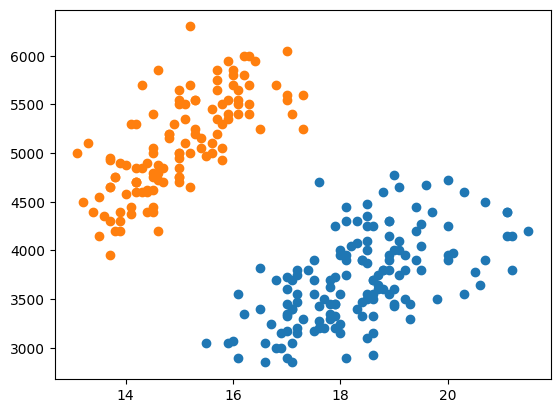

In [93]:
import matplotlib.pyplot as plt

cond_adel = df['species'] == 'Adelie'
cond_gent = df['species'] == 'Gentoo'

plt.scatter(df.loc[cond_adel, 'bill_depth_mm'], df.loc[cond_adel, 'body_mass_g'])
plt.scatter(df.loc[cond_gent, 'bill_depth_mm'], df.loc[cond_gent, 'body_mass_g'])

plt.show()

In [98]:
cond = df['species'].isin(['Aelie', 'Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
pg_data.head()

,bill_depth_mm,body_mass_g
220,13.2,4500.0
221,16.3,5700.0
222,14.1,4450.0
223,15.2,5700.0
224,14.5,5400.0


In [99]:
pg_target = df.loc[cond, ['species']]

In [96]:
from sklearn.model_selection import train_test_split

In [102]:
train_input, test_input, train_target, test_target = train_test_split(pg_data, pg_target, stratify=pg_target)

In [105]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [107]:
kn.score(test_input, test_target['species'])

1.0

In [108]:
mean = train_input.mean()
std = train_input.std()

In [109]:
train_scaled = (train_input - mean) / std

In [111]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [112]:
test_scaled = (test_input - mean) / std

In [113]:
kn.score(test_scaled, test_target)

1.0